## DBSCAN: ##

## Density Based Spatial Clustering of Applications with Noise ##

In [16]:
## DBSCAN pseudocode: ##

# DBSCAN(DB, distFunc, eps, minPts) {
#     C := 0                                                  /* Cluster counter */
#     for each point P in database DB {
#         if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
#         Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
#         if |N| < minPts then {                              /* Density check */
#             label(P) := Noise                               /* Label as Noise */
#             continue
#         }
#         C := C + 1                                          /* next cluster label */
#         label(P) := C                                       /* Label initial point */
#         SeedSet S := N \ {P}                                /* Neighbors to expand */
#         for each point Q in S {                             /* Process every seed point Q */
#             if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
#             if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
#             label(Q) := C                                   /* Label neighbor */
#             Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
#             if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
#                 S := S ∪ N                                  /* Add new neighbors to seed set */
#             }
#         }
#     }
# }


# RangeQuery(DB, distFunc, Q, eps) {
#     Neighbors N := empty list
#     for each point P in database DB {                      /* Scan all points in the database */
#         if distFunc(Q, P) ≤ eps then {                     /* Compute distance and check epsilon */
#             N := N ∪ {P}                                   /* Add to result */
#         }
#     }
#     return N
# }

In [17]:
# The DBSCAN algorithm can be abstracted into the following steps:[4]

# Find the points in the ε (eps) neighborhood of every point, and identify the core points with more than minPts neighbors.

# Find the connected components of core points on the neighbor graph, ignoring all non-core points.

# Assign each non-core point to a nearby cluster if the cluster is an ε (eps) neighbor, otherwise assign it to noise.

# A naive implementation of this requires storing the neighborhoods in step 1, 
# thus requiring substantial memory. The original DBSCAN algorithm does not require 
# this by performing these steps for one point at a time.

## Unsupervised Machine Learning Technique:

Whenever we have a group of data populated in 2- or 3-Dimensions we try to make up clusters based on distribution to find similar groupings.

## Epsilon:

Have to take radius of particular value of epsilon and create a circular boundary across it of that particular radius.

## Min-Points: ##

Minimum number of points required to be within the boundary created using the epsilon.

## Core Points : ##

Condition 1: Have to consider a boundary with a radius of our epsilon value 

Condition 2: Have to consider the minimum number of points that fall within this boundary should be at least equal to given minpts.

## Border Points: ##

Still part of cluster because it's within epsilon of a core point, but does not meet the min_points criteria.

## Noise Points: ##

Not assigned to a cluster. An outlier.

## The Math: ##

For any point p with distance to q, if it is less than or equal to the epsilon, then p belongs to this epsilon neighborhood of q.

$N_{eps}(q):$ {p belongs to D | dist(p, q) $\le$ Eps}

## The Algorithm ##


Arbitrarily select a point p

Retrieve all points density-reachable from p w.r.t. Eps and MinPts

If p is a core pont a cluster is formed

If p is a border point, no points are density reachable from p, and DBSCAN 
visits the next point of the database 

Continue the process until all of the points have been processed


## Parameters: ##

eps (epsilon): default = 0.5 - Max distance between two samples for one to be consider as in the neighborhood. Neighborhood radius. Most important parameter to choose appropriately.

min_samples (minimum samples): int, default=5 - Number of samples (or total weight) in a neighborhood for a point to be considered a core point. Includes the point itself.

metric: string, or callable, default='euclidean' - Metric to use when calculating distance between instances in feature array. 

metric_params: dict, default=None - Additional keyword arguments for metric function.

algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto' - Algorithm to be used by NearestNeighbors module to compute pointwise distances and find nearest neighbors.

leaf_size: int, default=30 - Leaf size passed to BallTree or cKDTree. Can affect speed of construction and query. 

p: float, default=None - Power of the Minkowski metric to be used to calculate the distance between points.

n_jobs: int, default=None - Number of parallel jobs to run. None means 1. -1 means using all processors.

## Attributes: ##

core_sample_indices_: ndarray of shape (n_core samples) - indices of core samples.

components_: ndarray of shape (n_core_samples, n_features) - Copy of each core sample found by training.

labels_: ndarray of shape (n_samples) - Cluster labels for each point in the dataset given to fit(). Noisy samples given label -1.

## DBSCAN Practice and Exploration:

In [18]:
url = "https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv"

In [19]:
# DBSCAN

# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv(url)
X = dataset.iloc[:, [3,4]].values

In [20]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [22]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3, min_samples=4)

In [23]:
# Fitting the model
model = dbscan.fit(X)
labels = model.labels_

In [24]:
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [25]:
from sklearn import metrics

# Identifying the points which makes up core points
sample_cores = np.zeros_like(labels, dtype=bool)
sample_cores[dbscan.core_sample_indices_]=True

In [26]:
# Calculating the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(metrics.silhouette_score(X, labels))

-0.1908319132560097


## Example Algorithm Pulled From Outside Source: ##

In [27]:
# Imports
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue
import scipy.io as spio

In [28]:
# Define label for different point group
NOISE = 0
UNASSIGNED = 0
core = -1
edge = -2

In [29]:
# Function to find all neighbor points in radius
def neighbor_points(data, pointId, radius):
  points = []
  for i in range(len(data)):
    # Euclidean distance using L2 Norm
    if np.linalg.norm(data[i] - data[pointId]) <= radius:
      points.append(i)
  return points

In [30]:
# DB Scan algorithm
def dbscan(data, Eps, MinPt, train):
  # Initialize all pointlabel to u nassign
  pointlabel = [UNASSIGNED] * len(data)
  pointcount = []
  # initialize list for core/noncore point
  corepoint = []
  noncore = []

  # Find all neighbor for all point
  for i in range(len(data)):
    pointcount.append(neighbor_points(train, i, Eps))

  # Find all core point, edgepoint and noise
  for i in range(len(pointcount)):
    if (len(pointcount[i]) >= MinPt):
      pointlabel[i] = core
      corepoint.append(i)
    else:
      noncore.append(i)

  for i in noncore:
    for j in pointcount[i]:
      if j in corepoint:
        pointlabel[i] = edge

        break

  # Start assigning point to cluster
  cl = 1

  # Using a Queue to put all neighbor core point in queue and find neighbor's neighbor
  for i in range(len(pointlabel)):
    q = queue.Queue()
    if (pointlabel[i] == core):
      pointlabel[i] = cl
      for x in pointcount[i]:
        if (pointlabel[x] == core):
          q.put(x)
          pointlabel[x] = cl
        elif(pointlabel[x] == edge):
          pointlabel[x] = cl
      # Stop when all points in Queue has been checked
      while not q.empty():
        neighbors = pointcount[q.get()]
        for y in neighbors:
          if (pointlabel[y] == core):
            pointlabel[y] = cl
            q.put(y)
          if (pointlabel[y] == edge):
            pointlabel[y] = cl

      cl = cl+1 # move to next cluster

  return pointlabel, cl

In [31]:
# Function to plot finjal result
def plotRes(data, clusterRes, clusterNum):
  nPoints = len(data)
  scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
  for i in range(clusterNum):
    if (i==0):
      # plot all noise point as blue
      color = 'blue'
    else:
      color = scatterColors[i % len(scatterColors)]
    x1 = []; y1 = []
    for j in range(nPoints):
      if clusterRes[j] == i:
        x1.append(data[j, 0])
        y1.append(data[j, 1])
    plt.scatter(x1, y1, c=color, alpha=1, marker='.')

In [32]:
# Create data
points = [(0,0), (1,0), (1,1), (2,2), (3,1), (3,0), (0,1), (3,2), (6,3)]
points
df = pd.DataFrame(points, columns=["x", "y"])
df.head()

,x,y
0,0,0
1,1,0
2,1,1
3,2,2
4,3,1


In [33]:
# # Load data
# train = df.values

# # Set Eps and Midpoint
# epss = [0, 5]
# minptss = [0, 4]
# # Find ALL cluster, outliers in different setting and print results
# for eps in epss:
#   for minpts in minptss:
#     print("Set eps = " +str(eps)+ " ,Minpoints = " +str(minpts))
#     pointlabel, cl = dbscan(train, eps, minpts)
#     plotRes(train, pointlabel, cl)
#     plt.show()
#     print("number of clusters found: " + str(cl-1))
#     counter = collections.Counter(pointlabel)
#     print(counter)
#     outliers = pointlabel.count(0)
#     print("Number of outliers found: " +str(outliers) + "\n")

## Testing Algorithm Against sklearn DBScan: ##

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


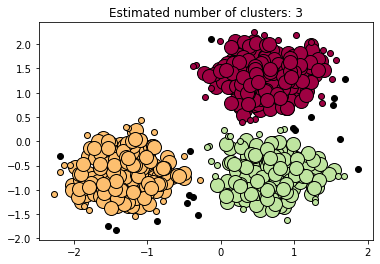

In [34]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [35]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

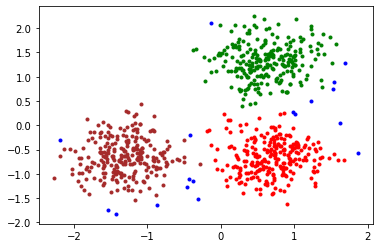

number of clusters found: 3
Number of outliers found: 18



In [36]:
# Set Eps and Midpoint
eps = 0.3
minpts = 10

pointlabel, cl = dbscan(X, eps, minpts, X)
plotRes(X, pointlabel, cl)
plt.show()
print("number of clusters found: " + str(cl-1))
outliers = pointlabel.count(0)
print("Number of outliers found: " +str(outliers) + "\n")

## Use Algorithm Above to Create a Roadmap for my Own Algorithm: ##

In [37]:
# Create Node class for the LinkedList class
class Node:
  def __init__(self, value, next_node=None):
    # value the node is holding
    self.value = value
    # reference to the next node in the linked list
    self.next_node = next_node

  # method to get value of the node
  def get_value(self):
    return self.value

  # method to get the node3's next node
  def get_next(self):
    return self.next_node

  # method to update the node's next_node to the input node
  def set_next(self, new_next):
    self.next_node = new_next

In [38]:
# Create LinkedList class for the Queue class
class LinkedList:

  def __init__(self):
    self.head = None
    self.tail = None

  def add_to_tail(self, value):
    # wrap value in a node
    new_node = Node(value)
    # check if linked list is empty
    if self.head is None and self.tail is None:
      # set head and tail to the new node
      self.head = new_node
      self.tail = new_node
    # otherwise the list has at least one node
    else:
      # update the last nbode's 'next node' to the new node
      self.tail.set_next(new_node)
      # update self.tail to point to the new node we just added
      self.tail = new_node

  def remove_tail(self):
    # check if LinkedList is empty
    if self.head is None and self.tail is None:
      return None
    
    # check if the linked list has only one node
    if self.head == self.tail:
      # store the node we're going to remove's value
      val = self.head.get_value()
      self.head = None
      self.tail = None
      return val

    # otherwise linked list has more than one node
    else:
      # store last node's value in another variable so we can return it
      val = self.tail.get_value()
      
      
      current = self.head

      # keep iterating until the node after 'current' is the tail
      while current.get_next() != self.tail:
        # keep iterating
        current = current.get_next()

      # set self.tail to current
      self.tail = current
      # set new tail's next_node to None
      self.tail.set_next(None)
      return val

  def remove_head(self):
    # check if linked list is empty
    if self.head is None and self.tail is None:
      return None
    # check if there is only one linked list node
    if self.head == self.tail:
      val = self.head.get_value()
      self.head = None
      self.tail = None
      return val

    else:
      # store the old head's value that we need to return
      val = self.head.get_value()
      # set self.head to the old head's next node
      self.head = self.head.get_next()
      # return the old head's value
      return val

  def contains(self, value):
    if not self.head:
      return False

    # get a reference to the node we're currently at
    # update this as we travwerse the list
    current = self.remove_head
    # check to see if we're at a valid node
    while current:
      # return True if current value we're looking at matches target value
      if current.get_value() == value:
        return True
      # update our current node to the current node's next node
      current = current.get_next()
    # if we've gotten here, then the target node isn't in our list
    return False
  
  def get_max(self):
    if not self.head:
      return None
    # reference to the largest value we've seen so far
    max_value = self.head.get_value()
    # reference to our current node as we traverse the list
    current = self.head.get_next()
    # check to see if we're still at a valid list node
    while current:
      # check to see if the current value is greater than the max value
      if current.get_value() > max_value:
        # if so, update our max value variable
        max_value = current.get_value()
      # update the current node to the nextg node in the list
      current = current.get_next()
    return max_value

In [39]:
# Create queue class for use in DensityScan class
class Queue:
  def __init__(self):
    self.size = 0
    self.storage = LinkedList()

  def __len__(self):
    return self.size # return size of the queue

  def enqueue(self, value):
    # insert tail to the queue
    self.storage.add_to_tail(value)
    self.size += 1 # increment size of queue by 1

  def dequeue(self):
    if self.size > 0: # check that there are items in the queue
      val = self.storage.remove_head() # remove head of queue (first node) and store the value of the node removed
      self.size -= 1 # decrement size by 1
      return val # return value of the removed node
    return None # if there is nothing in the queue, return None

In [40]:
from scipy.spatial import distance

# Create dbscan class
class DensityScan:

  def __init__(self, data, eps, minpts):
    self.data = data
    self.eps = eps
    self.minpts = minpts
    self.noise = 0
    self.unassigned = 0
    self.core = -1
    self.edge = -2

  def neighbors(self, point_index):
    neighbor_points = []
    for i in range(len(self.data)):
      if distance.euclidean(self.data[i], self.data[point_index]) <= self.eps:
        neighbor_points.append(i)
    return neighbor_points

  def scanner(self):
    # allocate memory for labels using list of 0s
    labels = [self.unassigned] * len(self.data)
    points = []
    cores = []
    other_points = []

    # Find the neighbors for all points
    [points.append(self.neighbors(i)) for i in range(len(self.data))]

    # find core, edge, and noise points
    for i in range(len(points)):
      if (len(points[i]) >= self.minpts):
        labels[i] = self.core
        cores.append(i)
      else:
        other_points.append(i)

    for i in other_points:
      for j in points[i]:
        if j in cores:
          labels[i] = self.edge

          break

    # start clustering
    clust = 1

    # Use Queue for nieghboring core points; find neighbor's neighbors
    for i in range(len(labels)):
      queue = Queue()
      if (labels[i] == self.core):
        labels[i] = clust
        for x in points[i]:
          if (labels[x] == self.core):
            queue.enqueue(x)
            labels[x] = clust
          elif (labels[x] == self.edge):
            labels[x] = clust

        # stop when all points checked
        while queue.__len__() > 0:
          neighbors = points[queue.dequeue()]
          for y in neighbors:
            if (labels[y] == self.core):
              labels[y] = clust
              queue.enqueue(y)
            if (labels[y] == self.edge):
              labels[y] = clust

        clust += 1

    return labels, clust

  # method for plotting results
  def plotscan(self, labels, clusters):
    num_points = len(self.data)
    colors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusters):
      if (i == 0):
        # plot noise as blue
        color = 'blue'
      else:
        color = colors[i % len(colors)]
      x1 = []; y1 = []
      for j in range(num_points):
        if labels[j] == i:
          x1.append(self.data[j, 0])
          y1.append(self.data[j, 1])
      plt.scatter(x1, y1, c=color, alpha=1, marker='.')

In [41]:
# Set eps and minpts
eps = 0.3
minpts = 10

# Instantiate DensityScan class
dscan = DensityScan(X, eps, minpts)
labels, clusters = dscan.scanner()

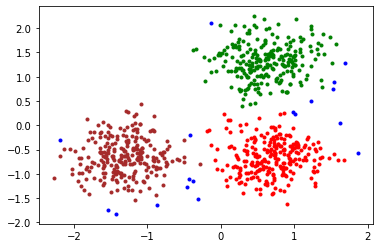

Number of clusters found: 3
Number of outliers found: 18



In [42]:
# Plot the results
dscan.plotscan(labels, clusters)
plt.show()
print("Number of clusters found: " + str(clusters-1))
outliers = labels.count(0)
print("Number of outliers found: " + str(outliers) + "\n")

In [43]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-08-26 19:21:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.2’

iris.data.2         100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-08-26 19:21:40 (108 MB/s) - ‘iris.data.2’ saved [4551/4551]



In [44]:
data = "iris.data"

In [45]:
import pandas as pd
df = pd.read_csv(data, names=["sep_length", "sep_width", "pet_length", "pet_width", "class"])

In [46]:
df.head()

,sep_length,sep_width,pet_length,pet_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df[["sep_length", "sep_width", "pet_length", "pet_width"]]

,sep_length,sep_width,pet_length,pet_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [91]:
eps = 0.6
minpt = 5
train = df[["sep_length", "sep_width", "pet_length", "pet_width"]].values

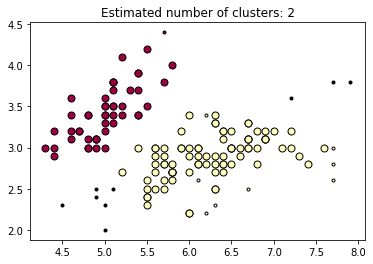

In [95]:
# Compute DBSCAN
db = DBSCAN(eps, minpt).fit(train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = train[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()